# **K-Nearest Neighbor**

### **Import**

In [1267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### **Load the Data**

In [1268]:
df = pd.read_csv('../cleaned_data.csv')

## **Model Training**

### **Model 1: All Features (K-value = 1)**

In [1269]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

In [1270]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)

In [1271]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(564, 11)
(564,)
(141, 11)
(141,)


In [1272]:
knn = KNeighborsClassifier(n_neighbors=1)

In [1273]:
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [1274]:
y_pred = knn.predict(X_test)

In [1275]:
metrics.accuracy_score(y_test, y_pred)

0.8581560283687943

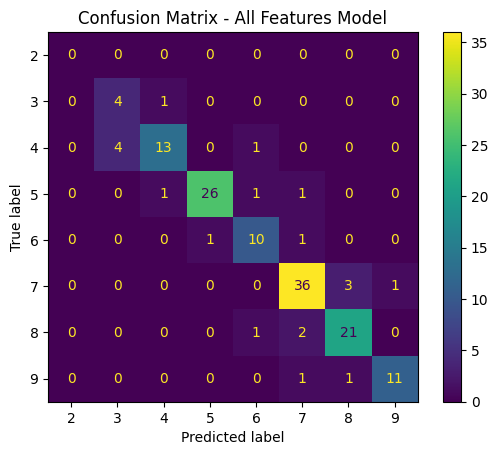

In [1276]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()
plt.title('Confusion Matrix - All Features Model')
plt.show()

In [1277]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8685
Recall: 0.8582
F1-Score: 0.8607


### **Model 2: Selected Features (K-value = 5)**

In [1278]:
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 
                     'Sleep_Hours_Per_Night', 'Affects_Academic_Performance', 
                     'Avg_Daily_Usage_Hours']

X_selected = df[selected_features].values
y_selected = df['Addicted_Score'].values

In [1279]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, 
                                                                                        y_selected, 
                                                                                        test_size=0.2, 
                                                                                        random_state=5)

In [1280]:
print(X_train_selected.shape)
print(y_train_selected.shape)
print(X_test_selected.shape)
print(y_test_selected.shape)

(564, 5)
(564,)
(141, 5)
(141,)


In [1281]:
knn_selected = KNeighborsClassifier(n_neighbors=5)

In [1282]:
knn_selected.fit(X_train_selected, y_train_selected)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [1283]:
y_pred_selected = knn_selected.predict(X_test_selected)

In [1284]:
accuracy = metrics.accuracy_score(y_test_selected, y_pred_selected)
print(f"Model Accuracy: {accuracy:.4f}")
accuracy

Model Accuracy: 0.8794


0.8794326241134752

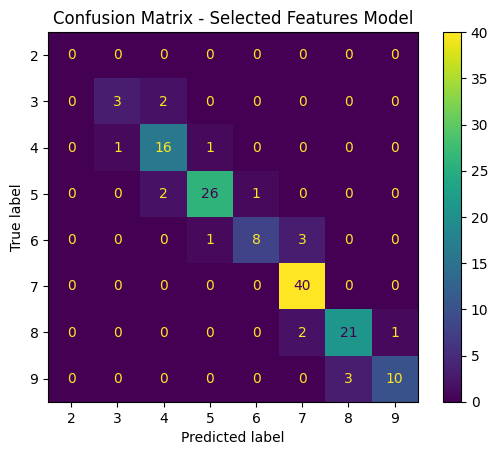

In [1285]:
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected, labels=knn_selected.classes_)

disp_selected = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_selected,
                                       display_labels=knn_selected.classes_)
disp_selected.plot()
plt.title('Confusion Matrix - Selected Features Model')
plt.show()

In [1286]:
precision = precision_score(y_test_selected, y_pred_selected, average='weighted')
recall = recall_score(y_test_selected, y_pred_selected, average='weighted')
f1 = f1_score(y_test_selected, y_pred_selected, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8803
Recall: 0.8794
F1-Score: 0.8764
